        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Group Project - Fall 2020</h1>

You need to work as a team for this project. Your job is to develop a predictive model that can predict whether or not a movie is a <i>Comedy</i>. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Comedy.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Additional Note:</b> This note provides additional guideline for the project.

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Comedy or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) ComedyGenre. The value for the thirrd column should be in a binary format. If the movie is comedy the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Comedy movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

Keep in mind that the above steps are only provide guidelines. There are more detail works in this project that should be captured by students. 

<b>Extra Credit</b> The group with the best prediction model is going to get extra points.

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final submited file should be very well structured and should have a consistent flow of analysis.</li>
    <li>You may want to use an additional word document to report the result of your analysis</li>
</ul>

#### Due Date: Nov 30 2020 at 11:59 PM

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">100%</b></td>
    </tr>
</table>

<h2>Reading CSV Files

In [1]:
import pandas as pd
import numpy as np

movie_ss = pd.read_csv("movie_story_student_file.csv")         #Reading Story student file
movie_gen = pd.read_csv("movies.csv")


<h2>Exploring Dataset

In [2]:
movie_ss.head()                          #Exploring the movie story student file

,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...


In [3]:
movie_ss.describe() 

,movie_id
count,20000.000000
mean,140334.467200
std,43348.223999
min,27509.000000
25%,106110.500000
50%,148694.000000
75%,173923.500000
max,209163.000000


In [4]:
movie_gen.head()                     #Exploring the movie genre file 

,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller


In [5]:
movie_gen.describe()

,movieId
count,23498.000000
mean,142181.445442
std,44592.867342
min,27509.000000
25%,109081.000000
50%,149761.500000
75%,179048.500000
max,209163.000000


<h1>Joining two dataframes and renaming it

In [6]:
#Creating a new file 'main_dataset' using inner join method and dropping columns which does not have common movie_id 
main_dataset = pd.merge(movie_ss, movie_gen, left_on='movie_id', right_on='movieId', how='inner').drop(['movieId','title'], axis=1)
main_dataset = main_dataset.rename(columns={"genres":"ComedyGenre"})          
main_dataset.head()

,movie_id,story,ComedyGenre
0,131072,A girl who always tends to fall in love with t...,Comedy
1,196609,"Bigfoot has come to the town of Ellwood City, ...",Comedy|Horror
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Documentary
3,196611,"In her first special since 2003, Ellen revisit...",Comedy
4,196613,Mike and Sulley are back at Monsters Universit...,Animation|Children|Comedy|Fantasy


<h1> Converting the target column to binary

In [16]:
import warnings
warnings.filterwarnings('ignore')

fil = main_dataset.ComedyGenre.str.contains("Comedy")        #Displaying binary output in ComedyGenre column 1 = ComedyGenre
Nfil = ~fil
main_dataset.ComedyGenre[fil] = 1
main_dataset.ComedyGenre[Nfil] = 0

In [17]:
main_dataset.head()

,movie_id,story,ComedyGenre
0,131072,A girl who always tends to fall in love with t...,1
1,196609,"Bigfoot has come to the town of Ellwood City, ...",1
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",0
3,196611,"In her first special since 2003, Ellen revisit...",1
4,196613,Mike and Sulley are back at Monsters Universit...,1


<h1>Applying Text Analysis and removing Stopwords

In [18]:
data = main_dataset["story"]                  #Assigning variables for Story and ComedyGenre
y = main_dataset["ComedyGenre"]                

In [19]:
y=y.astype('int')                             

In [20]:
import nltk
nltk.download('stopwords')                          #Importing nltk package for applying Stopwords removal technique
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Converting all strings into lowercase and splitting it for removing Stopwords
main_dataset['story'] = main_dataset['story'].str.lower()  
main_dataset['story_without_stopwords'] = main_dataset['story'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
main_dataset.head()

,movie_id,story,ComedyGenre,story_without_stopwords
0,131072,a girl who always tends to fall in love with t...,1,girl always tends fall love wrong guy meets on...
1,196609,"bigfoot has come to the town of ellwood city, ...",1,"bigfoot come town ellwood city, pa causing big..."
2,131074,"at an altitude of 18,000 feet, alaska\'s mount...",0,"altitude 18,000 feet, alaska\'s mount st. elia..."
3,196611,"in her first special since 2003, ellen revisit...",1,"first special since 2003, ellen revisits road ..."
4,196613,mike and sulley are back at monsters universit...,1,mike sulley back monsters university fun-fille...


# Applying Wordcloud


In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mask = np.array(Image.open("Movies.jpg"))


In [11]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [12]:
transformed_mask = np.ndarray((mask.shape[0],
                                    mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

In [23]:
text = " ".join(story for story in main_dataset.story_without_stopwords)

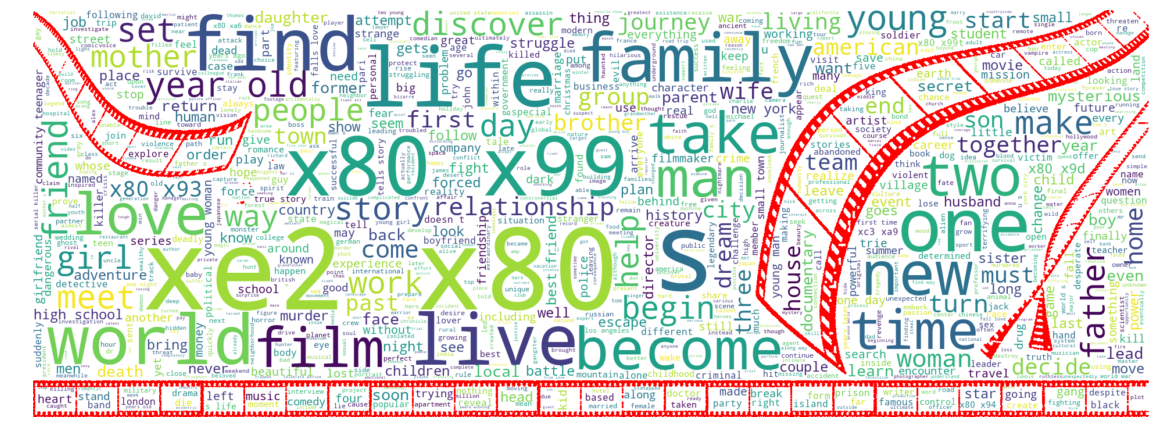

In [24]:
wc = WordCloud(background_color="white", max_words=1000, 
               mask=transformed_mask, contour_width=3, 
               contour_color='red')
wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
vect = CountVectorizer(ngram_range=(1,3),stop_words='english')
vect.fit(main_dataset.story_without_stopwords)
len(vect.vocabulary_)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1030547

In [14]:
X = vect.transform(main_dataset.story_without_stopwords)       

In [15]:
# Accuracy of KNN Model after removing Stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
y_test_hat = model.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_test_hat, normalize = True) * 100,2)) 
print(classification_report(y_test,y_test_hat))

Accuracy : 73.22
              precision    recall  f1-score   support

           0       0.74      0.99      0.84      4420
           1       0.25      0.01      0.02      1580

    accuracy                           0.73      6000
   macro avg       0.50      0.50      0.43      6000
weighted avg       0.61      0.73      0.63      6000



In [16]:
# Accuracy of Stochastic Gradient Desecent Classifier Model after removing Stopwords
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = SGDClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for SGDClassifier: {}".format(round(accuracy_score(y_test,y_test_hat) * 100,2)))
print(classification_report(y_test,y_test_hat))

Accuracy for SGDClassifier: 77.92
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4420
           1       0.64      0.38      0.47      1580

    accuracy                           0.78      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.76      0.78      0.76      6000



In [17]:
# Accuracy of Multinomial Naive Bayes Model after removing Stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for MultinomialNB: {}".format(round(accuracy_score(y_test,y_test_hat) * 100,2)))
print(classification_report(y_test,y_test_hat))

Accuracy for MultinomialNB: 76.27
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4420
           1       0.55      0.55      0.55      1580

    accuracy                           0.76      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.76      0.76      0.76      6000



In [18]:
# Accuracy of Logistic Regression Model after removing Stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = LogisticRegression(max_iter=300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_test_hat) * 100,2))
print(classification_report(y_test,y_test_hat))

Accuracy: 78.77
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4420
           1       0.70      0.34      0.46      1580

    accuracy                           0.79      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.77      0.79      0.76      6000



After removing Stopwords from the main_dataset and evaluating Supervised learning models, Logistic Regression model exhibited highest accuracy score of 79%. The precision, recall and f1- scores for this model were found to be highest among other models for binary '0' and '1'.

# Apply Stemming approach

In [19]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

main_dataset['unstemmed'] = main_dataset["story_without_stopwords"].str.split()                         # Splitting every word and adding onto unstemmed words dataframe
main_dataset['story_stemmed'] = main_dataset['unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
main_dataset.head()

,movie_id,story,ComedyGenre,story_without_stopwords,unstemmed,story_stemmed
0,131072,a girl who always tends to fall in love with t...,1,girl always tends fall love wrong guy meets on...,"[girl, always, tends, fall, love, wrong, guy, ...","[girl, alway, tend, fall, love, wrong, guy, me..."
1,196609,"bigfoot has come to the town of ellwood city, ...",1,"bigfoot come town ellwood city, pa causing big...","[bigfoot, come, town, ellwood, city,, pa, caus...","[bigfoot, come, town, ellwood, city,, pa, caus..."
2,131074,"at an altitude of 18,000 feet, alaska\'s mount...",0,"altitude 18,000 feet, alaska\'s mount st. elia...","[altitude, 18,000, feet,, alaska\'s, mount, st...","[altitud, 18,000, feet,, alaska\', mount, st.,..."
3,196611,"in her first special since 2003, ellen revisit...",1,"first special since 2003, ellen revisits road ...","[first, special, since, 2003,, ellen, revisits...","[first, special, sinc, 2003,, ellen, revisit, ..."
4,196613,mike and sulley are back at monsters universit...,1,mike sulley back monsters university fun-fille...,"[mike, sulley, back, monsters, university, fun...","[mike, sulley, back, monster, univers, fun-fil..."


In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from html import unescape
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()                       # Defining new tokenizer
def my_tokenizer(doc):
    tokens = word_tokenize(doc)
    return([stemmer.stem(token) for token in tokens])

def my_preprocessor(doc):                        # Removing html entities from document and setting everything to lowercase
    return(unescape(doc).lower())

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

custom_vec = TfidfVectorizer(tokenizer=my_tokenizer,                   #Calling TfidVectorizer function and applying Stemming  approach to dataset without Stopwords
                             preprocessor=my_preprocessor, 
                             ngram_range=(1,3))
X = custom_vec.fit_transform(main_dataset.story_without_stopwords)

In [23]:
# Accuracy of Logistic Regression Model after removing Stopwords and applying Stemming

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


model = LogisticRegression(max_iter=300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy Score for Logistic Regression model :", round(accuracy_score(y_test,y_test_hat) * 100,2))
print(classification_report(y_test,y_test_hat))

Accuracy Score for Logistic Regression model : 74.23
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      4420
           1       0.89      0.02      0.05      1580

    accuracy                           0.74      6000
   macro avg       0.81      0.51      0.45      6000
weighted avg       0.78      0.74      0.64      6000



In [24]:
# Accuracy of Multinomail NB Model after removing Stopwords and applying Stemming
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for MultinomialNB: {}".format(round(accuracy_score(y_test,y_test_hat) * 100,2)))
print(classification_report(y_test,y_test_hat))

Accuracy for MultinomialNB: 73.72
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      4420
           1       1.00      0.00      0.00      1580

    accuracy                           0.74      6000
   macro avg       0.87      0.50      0.43      6000
weighted avg       0.81      0.74      0.63      6000



In [25]:
# Accuracy of SGDC Model after removing Stopwords and applying Stemming
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = SGDClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for SGDClassifier: {}".format(round(accuracy_score(y_test,y_test_hat) * 100,2)))
print(classification_report(y_test,y_test_hat))

Accuracy for SGDClassifier: 75.35
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4420
           1       0.85      0.08      0.14      1580

    accuracy                           0.75      6000
   macro avg       0.80      0.54      0.50      6000
weighted avg       0.78      0.75      0.67      6000



In [26]:
# Accuracy of KNN Model after removing Stopwords and applying Stemming
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
y_test_hat = model.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_test_hat, normalize = True) * 100,2)) 
print(classification_report(y_test,y_test_hat))

Accuracy : 73.88
              precision    recall  f1-score   support

           0       0.76      0.95      0.84      4420
           1       0.51      0.15      0.23      1580

    accuracy                           0.74      6000
   macro avg       0.64      0.55      0.54      6000
weighted avg       0.69      0.74      0.68      6000



After removing Stopwords and applying Stemwords on the main_dataset and evaluating Supervised learning models, SGDC model exhibited highest accuracy score of 75.35%. The precision, recall and f1- scores for this model were found to be highest comparitively among other models.

# Training the Best model on the entire dataset

In [27]:
# Using TruncatedSVD function to performs linear dimensionality reduction by means of truncated singular value decomposition (SVD)
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 100)
X = tsvd.fit_transform(X)

In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


Bestmodel = SGDClassifier()          # Fitting the SGDC Classifier model as the best model
Bestmodel.fit(X, y)                  #Fitting the best model on full data available 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# Preparing Evaluation dataset file for prediction

In [25]:
movie_eval = pd.read_csv("movie_story_evaluation_file.csv")       # Reading the evaluation file for testing'
movie_gen = pd.read_csv("movies.csv")

In [26]:
#Creating a new file 'evaluation_dataset' using inner join method and dropping columns which does not have common movie_id 
evaluation_dataset = pd.merge(movie_eval, movie_gen, left_on='movie_id', right_on='movieId', how='inner').drop(['movieId','title'], axis=1)
evaluation_dataset = evaluation_dataset.rename(columns={"genres":"ComedyGenre"})
evaluation_dataset.head()

,movie_id,story,ComedyGenre
0,122349,Growing up in the Mission district of San Fran...,Drama
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance


In [27]:
import warnings
warnings.filterwarnings('ignore')

#Displaying binary output in ComedyGenre column 1 = ComedyGenre

fil = evaluation_dataset.ComedyGenre.str.contains("Comedy")
Nfil = ~fil
evaluation_dataset.ComedyGenre[fil] = 1
evaluation_dataset.ComedyGenre[Nfil] = 0

In [28]:
evaluation_dataset.head()

,movie_id,story,ComedyGenre
0,122349,Growing up in the Mission district of San Fran...,0
1,122351,A soldier returns home from the Iraq war only ...,0
2,122361,Marco the Monkey works as a beach officer. But...,1
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",0


In [29]:
#Assigning variables for ComedyGenre 
y_eval = evaluation_dataset["ComedyGenre"]               

In [30]:
y_eval=y_eval.astype('int')

In [31]:
# Converting all strings into lowercase and splitting it for removing Stopwords
evaluation_dataset['story'] = evaluation_dataset['story'].str.lower()  
evaluation_dataset['story_without_stopwords'] = evaluation_dataset['story'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
evaluation_dataset.head()

,movie_id,story,ComedyGenre,story_without_stopwords
0,122349,growing up in the mission district of san fran...,0,"growing mission district san francisco, che ri..."
1,122351,a soldier returns home from the iraq war only ...,0,soldier returns home iraq war haunted visions ...
2,122361,marco the monkey works as a beach officer. but...,1,marco monkey works beach officer. spends time ...
3,187901,"when an honest cop, vijay kumar\'s family is r...",0,"honest cop, vijay kumar\'s family ruthlessly s..."
4,187903,"kathiresan aka kaththi, a criminal, escapes fr...",0,"kathiresan aka kaththi, criminal, escapes kolk..."


# Applying Wordcloud for Evaluation dataset

In [32]:
text = " ".join(story for story in evaluation_dataset.story_without_stopwords)

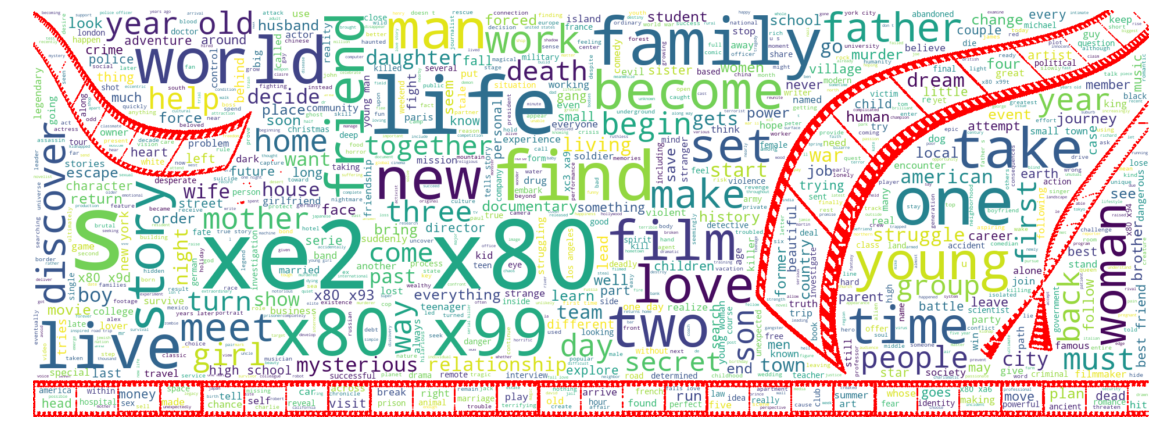

In [33]:
wc = WordCloud(background_color="white", max_words=1000, 
               mask=transformed_mask, contour_width=3, 
               contour_color='red')
wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

# Applying Stemming and Tfid

In [36]:
from html import unescape
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# defining new tokenizer
def my_tokenizer(doc):
    tokens = word_tokenize(doc)
    return([stemmer.stem(token) for token in tokens])

# remove html entities from docs and
# set everything to lowercase
def my_preprocessor(doc):
    return(unescape(doc).lower())

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

custom_vec = TfidfVectorizer(tokenizer=my_tokenizer, 
                             preprocessor=my_preprocessor, 
                             ngram_range=(1,3))
X_eval = custom_vec.fit_transform(evaluation_dataset.story_without_stopwords)

In [38]:
# Using TruncatedSVD to reduce the number of features so the Best Model can be fitted to the evaluation dataset. 
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 100)
X_eval = tsvd.fit_transform(X_eval)

In [39]:
evaluation_dataset['unstemmed'] = evaluation_dataset["story_without_stopwords"].str.split()
evaluation_dataset['story_stemmed'] = evaluation_dataset['unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
evaluation_dataset.head()

,movie_id,story,ComedyGenre,story_without_stopwords,unstemmed,story_stemmed
0,122349,growing up in the mission district of san fran...,0,"growing mission district san francisco, che ri...","[growing, mission, district, san, francisco,, ...","[grow, mission, district, san, francisco,, che..."
1,122351,a soldier returns home from the iraq war only ...,0,soldier returns home iraq war haunted visions ...,"[soldier, returns, home, iraq, war, haunted, v...","[soldier, return, home, iraq, war, haunt, visi..."
2,122361,marco the monkey works as a beach officer. but...,1,marco monkey works beach officer. spends time ...,"[marco, monkey, works, beach, officer., spends...","[marco, monkey, work, beach, officer., spend, ..."
3,187901,"when an honest cop, vijay kumar\'s family is r...",0,"honest cop, vijay kumar\'s family ruthlessly s...","[honest, cop,, vijay, kumar\'s, family, ruthle...","[honest, cop,, vijay, kumar\', famili, ruthles..."
4,187903,"kathiresan aka kaththi, a criminal, escapes fr...",0,"kathiresan aka kaththi, criminal, escapes kolk...","[kathiresan, aka, kaththi,, criminal,, escapes...","[kathiresan, aka, kaththi,, criminal,, escap, ..."


# Using Best model (SGDC Classifier) to predict movies are comedy or not and generating Classification report

In [40]:
# Predicting comedy genere for evaluation dataset:
y_test_hat = Bestmodel.predict(X_eval)
print("Accuracy:",round(accuracy_score(y_eval,y_test_hat) * 100,2))
print(classification_report(y_eval,y_test_hat))

Accuracy: 74.99
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2623
           1       0.50      0.00      0.01       875

    accuracy                           0.75      3498
   macro avg       0.63      0.50      0.43      3498
weighted avg       0.69      0.75      0.64      3498



Our model shows an accuracy of 75% on the evaluation dataset. It displays a precision of 0.75 for non Comedy movies and 0.5 for Comedy movies. The f1 score for non Comedy movie genre is 0.86 whereas it is 0.01 for comedy movies.